### Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('data/stud.csv')

In [5]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Shape of the Dataset**

In [6]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')

The dataset has 1000 rows and 8 columns


**Check for Missing Values**

In [7]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- There are no null values in the dataset

**Check for Duplicated Rows**

In [8]:
data.duplicated().sum()

np.int64(0)

- No duplicate rows in the dataset

**Check Datatypes**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- There are 3 columns of numerical type(integer), rest 5 columns are object type

**Check the number of unique values in each column**

In [10]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

**Check statistics of data set**

In [11]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race_ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental_level_of_education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_preparation_course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math_score,1000.0,NaN,NaN,NaN,66.089,15.16308,0.0,57.0,66.0,77.0,100.0
reading_score,1000.0,NaN,NaN,NaN,69.169,14.600192,17.0,59.0,70.0,79.0,100.0
writing_score,1000.0,NaN,NaN,NaN,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


- The mean scores for math, reading and writing tests are roughly in the range 66 - 70 marks
- The lowest score in maths is 0, while reading and writing tests have higher least scores, ie, 17 and 10 respectively
- The mean and median scores for each tests are almost equal, indicating normal distribution of the scores
- The reading test has higher average score than otehr tests, probably indicating its an easier exam for the students

**Exploring Dataset**

In [12]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
categorical_columns = data.select_dtypes(include='object')
for col in categorical_columns:
    print(col, ":" ,data[col].unique())
    print('-'*100)

gender : ['female' 'male']
----------------------------------------------------------------------------------------------------
race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
----------------------------------------------------------------------------------------------------
parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
----------------------------------------------------------------------------------------------------
lunch : ['standard' 'free/reduced']
----------------------------------------------------------------------------------------------------
test_preparation_course : ['none' 'completed']
----------------------------------------------------------------------------------------------------


**Feature Engineering**

In [21]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['percentage'] = np.round(data['total_score']/3, 2)

In [22]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [37]:
data[data['percentage']<40].shape[0]

30

In [29]:
data['no_of_subjects_failed'] = (data['math_score']<40).astype(int) + (data['reading_score']<40).astype(int) + (data['writing_score']<40).astype(int)

In [30]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,percentage,no_of_subjects_failed
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,0
1,female,group C,some college,standard,completed,69,90,88,247,82.33,0
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,0
4,male,group C,some college,standard,none,76,78,75,229,76.33,0


In [38]:
data[data['no_of_subjects_failed']>0].shape[0]

51

In [40]:
print(f'No of students failed in Math test : {data[data['math_score']<40].shape[0]}')
print(f'No of students failed in Reading test : {data[data['reading_score']<40].shape[0]}')
print(f'No of students failed in Writing test : {data[data['writing_score']<40].shape[0]}')

No of students failed in Math test : 40
No of students failed in Reading test : 26
No of students failed in Writing test : 32


- 30 students have percentage < 40, which is considered as fail grade
- 51 students have failed in atleast 1 of the 3 subjects
- Math seems to be the toughest exam as it has highest number of fail marks, indicating difficult subject
- Reading is the easiest exam with least number of fail marks, indicating easy subject

**Exploring Data ( Visualization )**

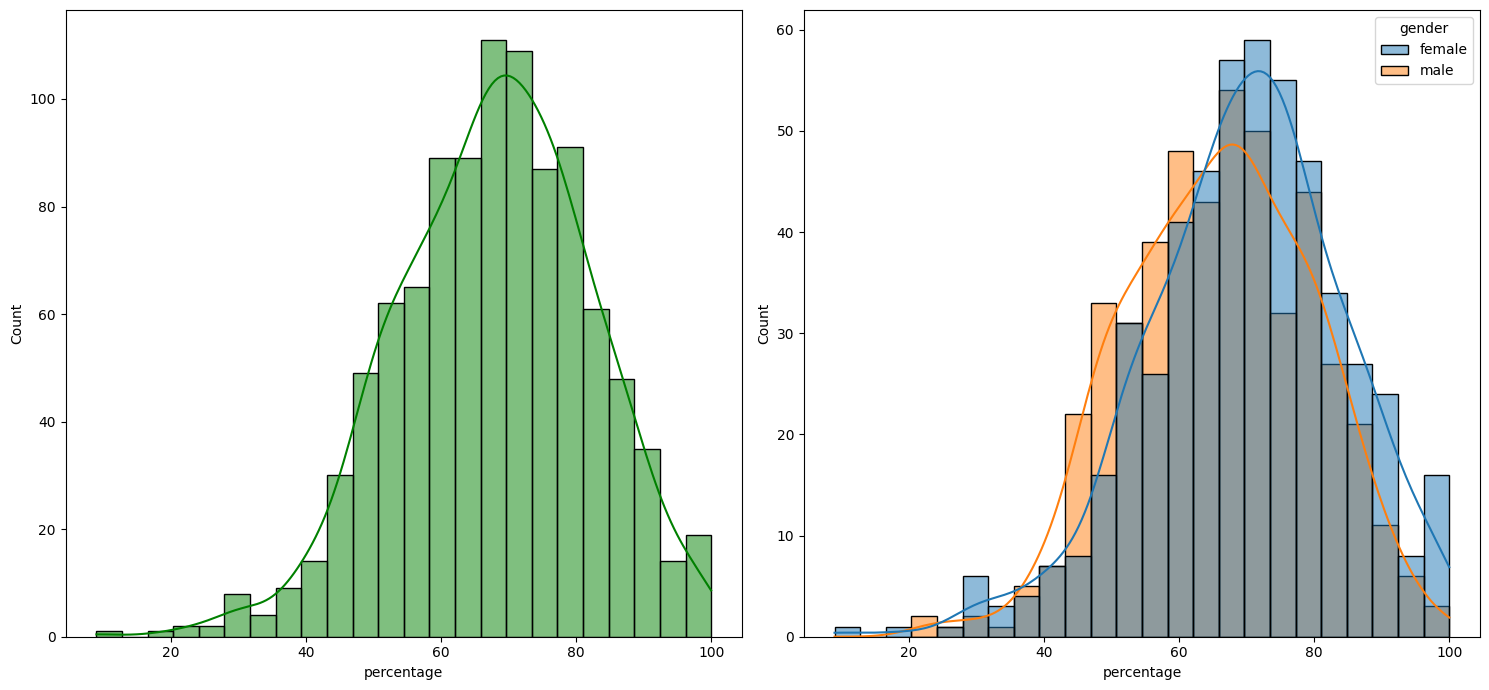

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data, x='percentage', kde=True, ax=axs[0], color='g')
sns.histplot(data, x='percentage', kde=True, hue='gender', ax=axs[1])

plt.tight_layout()
plt.show()

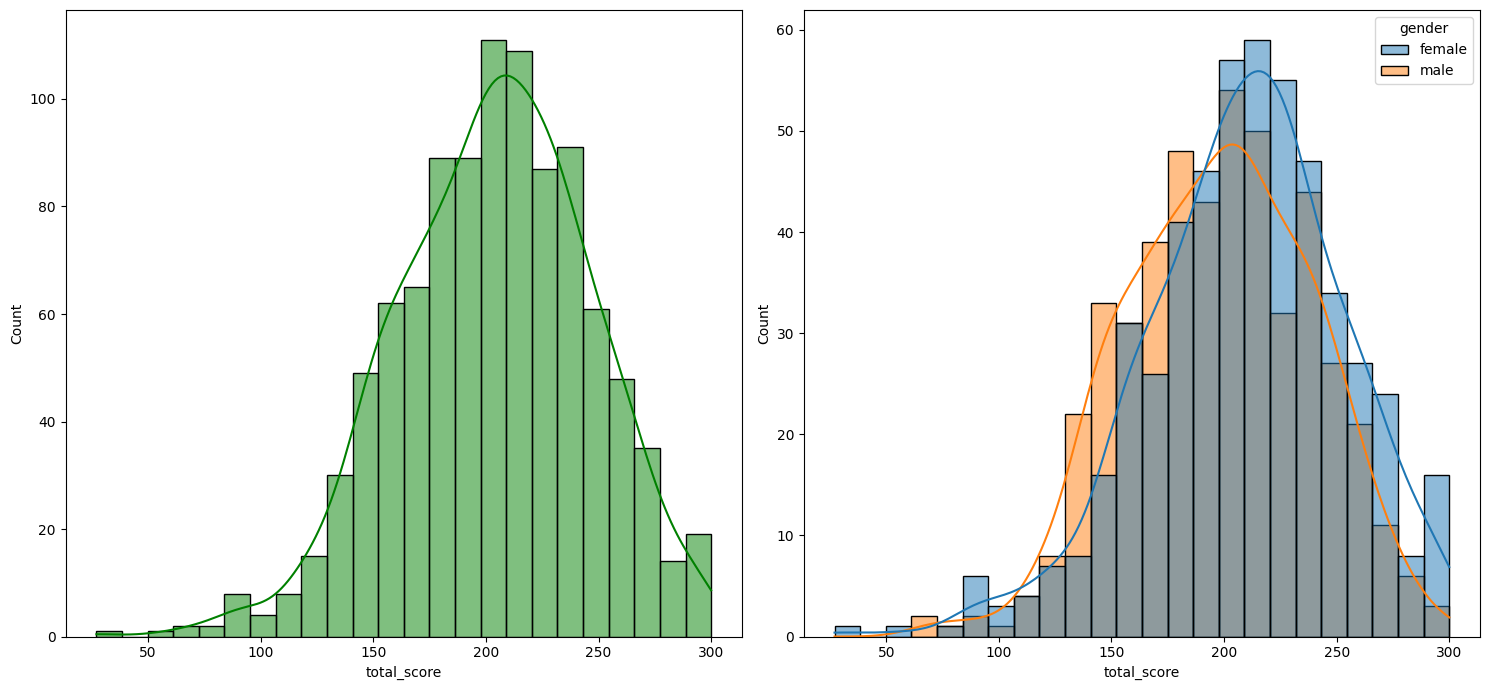

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data, x='total_score', ax=axs[0], color='g', kde=True)
sns.histplot(data, x='total_score', ax=axs[1], hue='gender', kde=True)

plt.tight_layout()
plt.show()

- Female students tend to perform better than male students.

<Axes: xlabel='test_preparation_course', ylabel='total_score'>

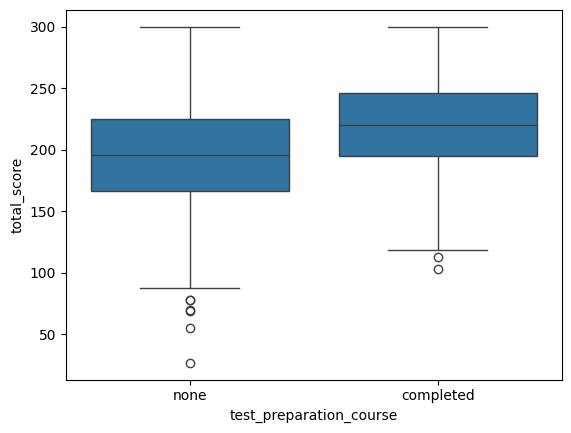

In [56]:
sns.boxplot(data, x='test_preparation_course', y='total_score')

- The median score of students who completed the test_preparation_course is above 200 and
- Majority of these students have scored between 200 and 300
- The students for whom the test_preparation_course status is None, have total_scores < 50
- 50% of these students score < 200

<Axes: xlabel='race_ethnicity', ylabel='total_score'>

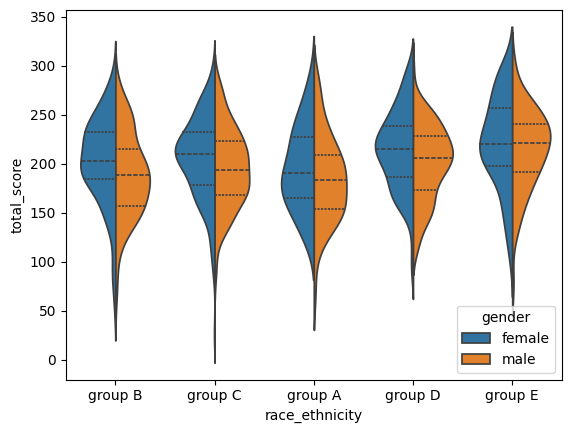

In [68]:
sns.violinplot(data, x='race_ethnicity', y='total_score', inner='quart', hue='gender', split=True)

- Students belonging to ethnic race A and B, have lower scores compared to other races, irrespective of the gender

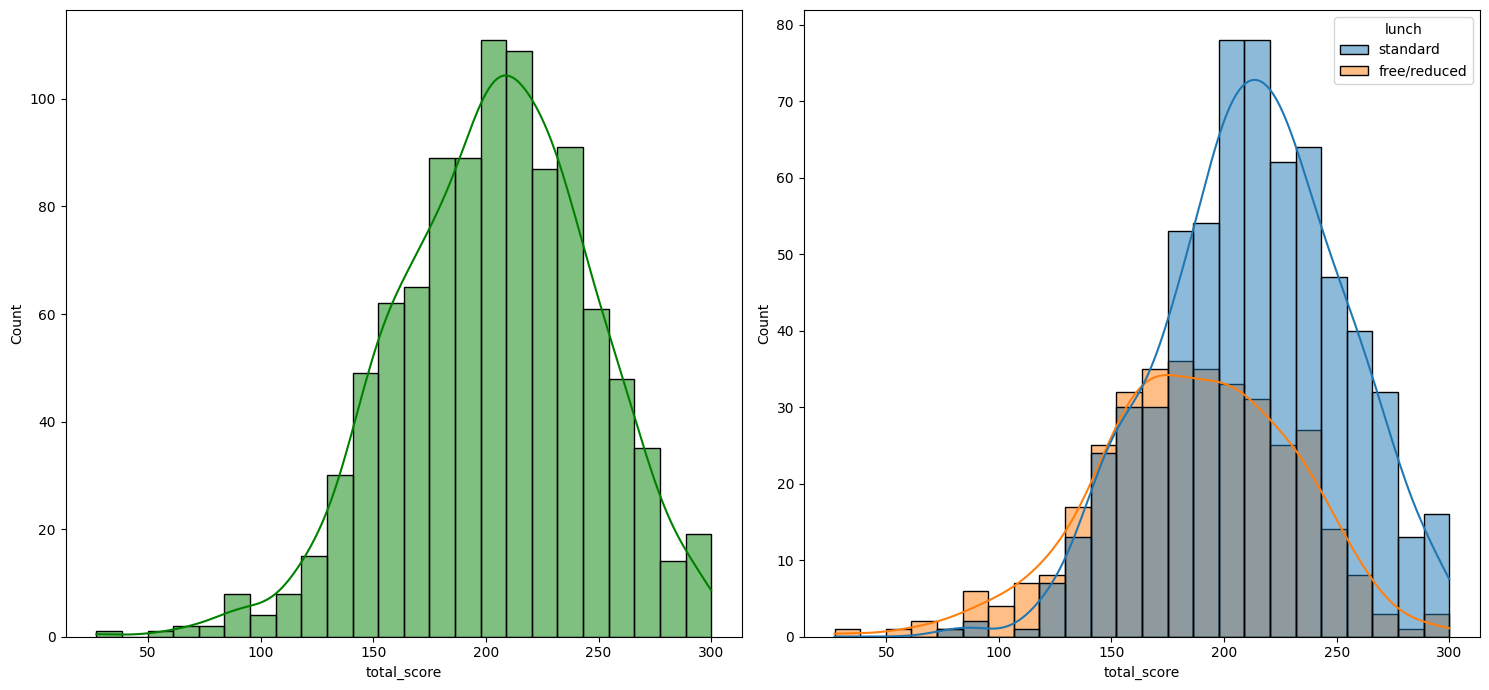

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data, x='total_score', kde=True, ax=axs[0], color='g')
sns.histplot(data, x='total_score', kde=True, hue='lunch', ax=axs[1])

plt.tight_layout()
plt.show()

- Students having standard lunches have much better average total score than students with free/reduces lunches

<Axes: xlabel='parental_level_of_education', ylabel='total_score'>

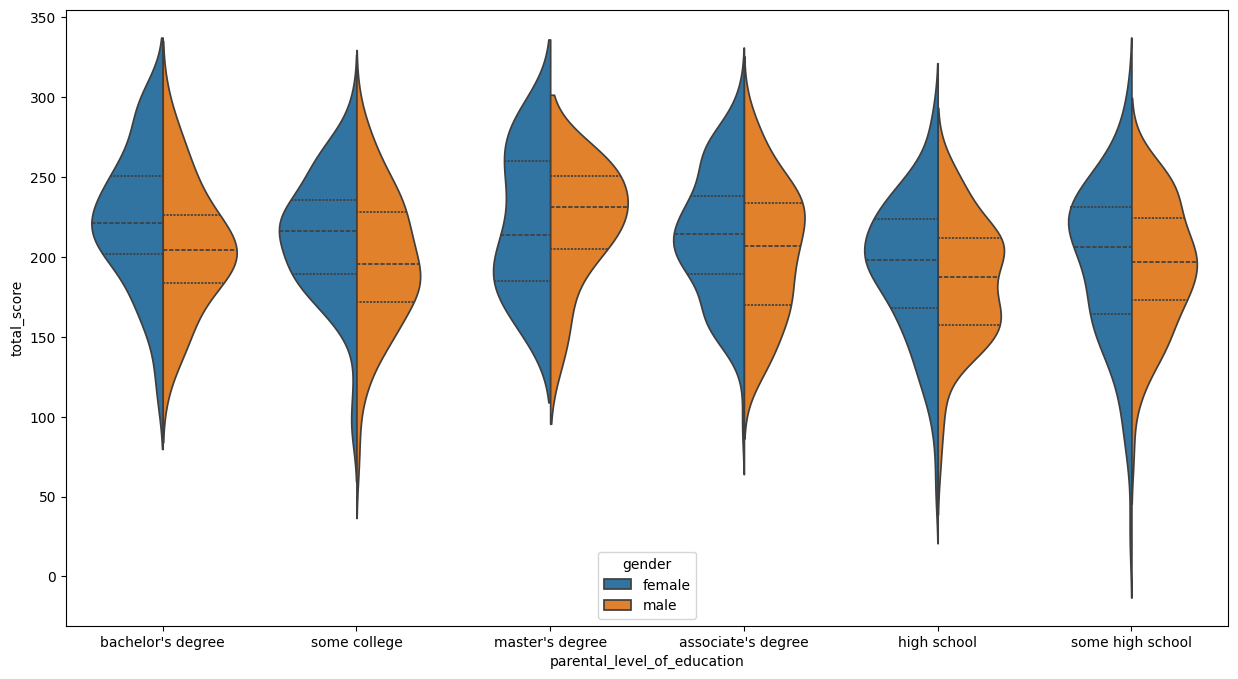

In [74]:
plt.figure(figsize=(15, 8))
sns.violinplot(data, x='parental_level_of_education', y='total_score', hue='gender', split=True, inner='quart')

- Students whose parents have college education, ie, assosciate degree, bachelor's or masters seems to have median score of 200
- Students whose parents have high school education, tend to have slightly lower total marks than students whose parents have college level education

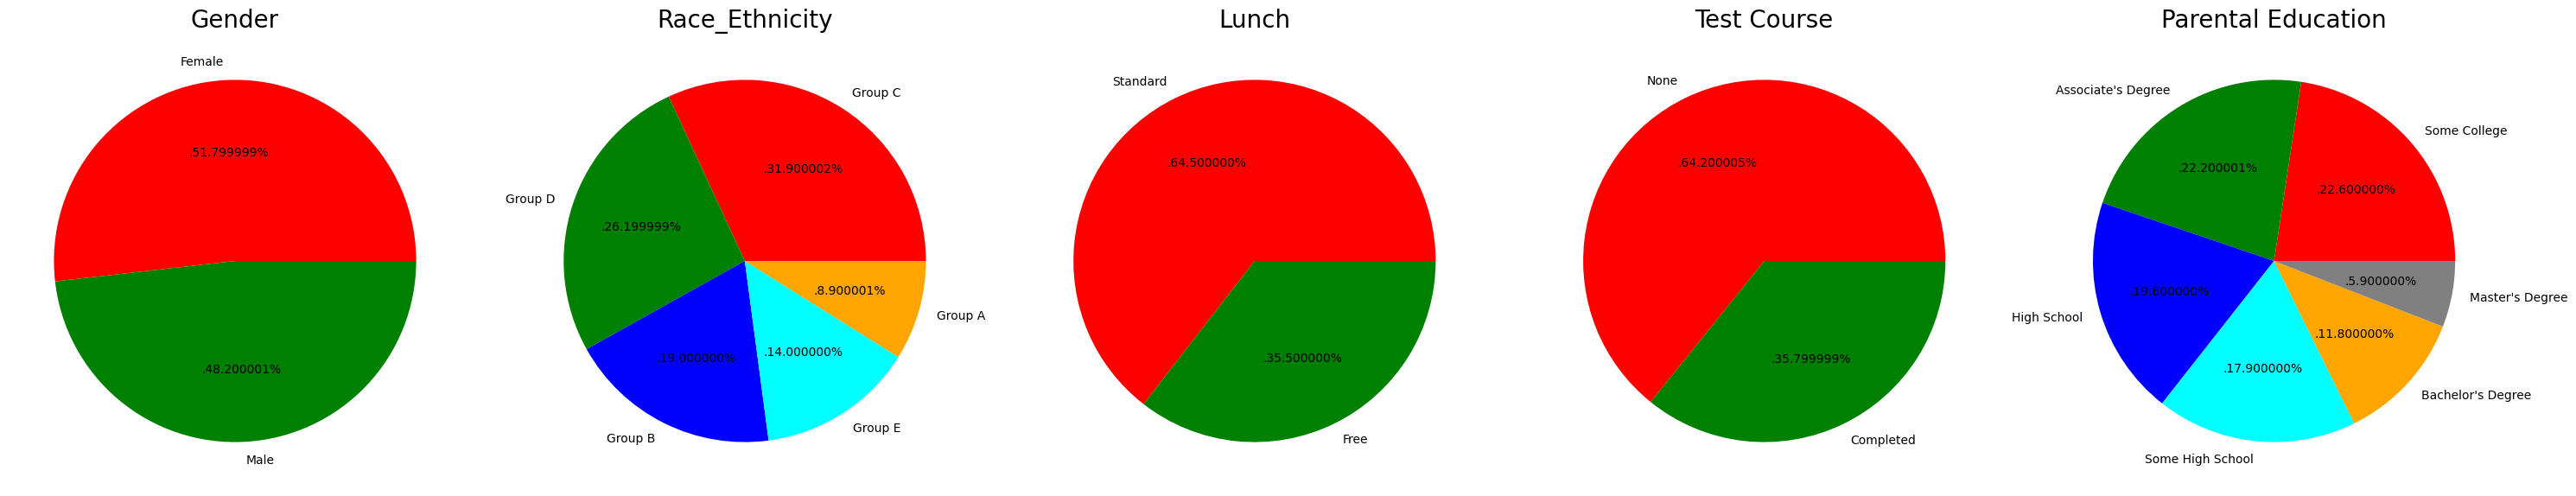

In [78]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = data['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = data['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = data['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

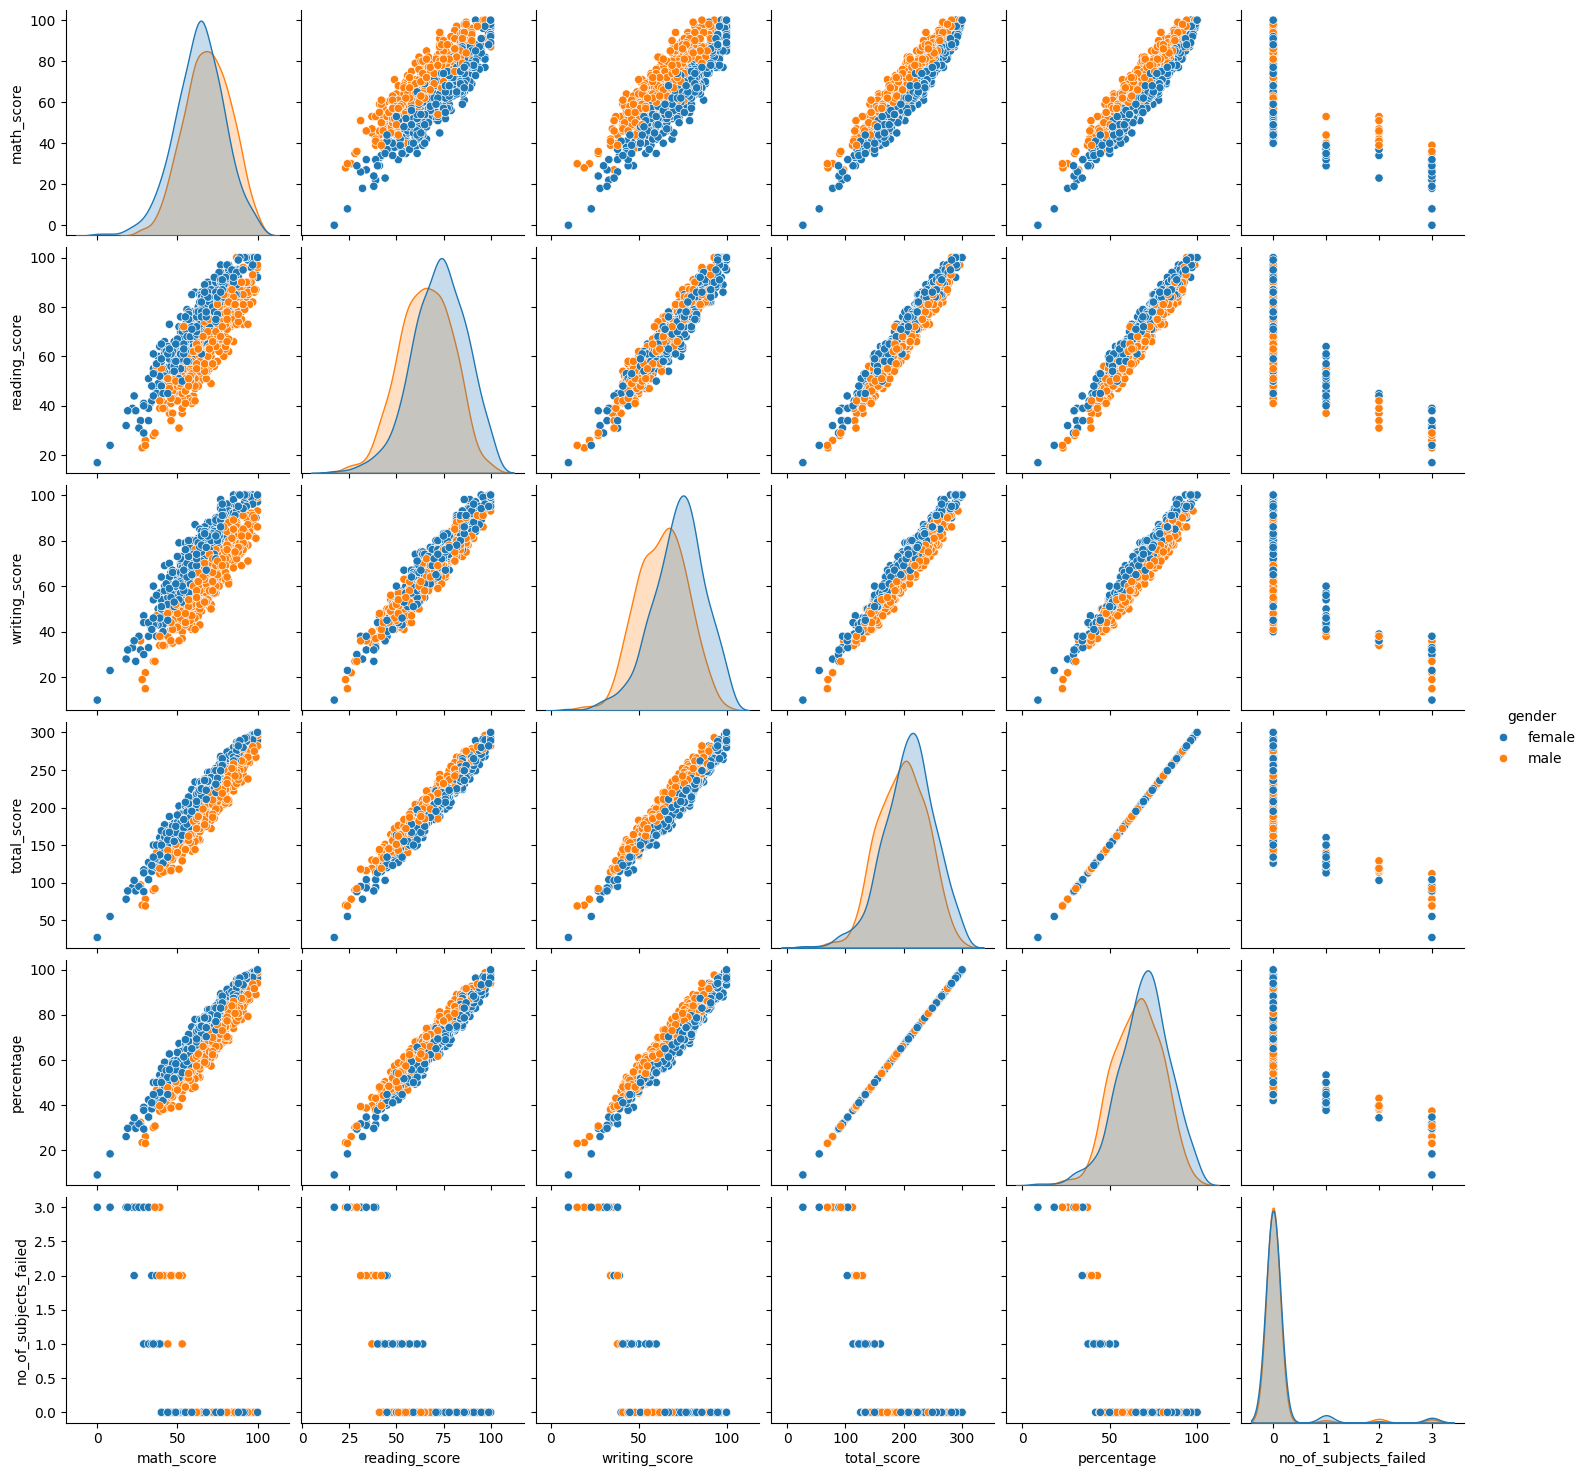

In [79]:
sns.pairplot(data,hue = 'gender')
plt.show()

### Final Conclusions

- Student scores are affected by Gender, Parental Level of Education, Lunch, Race/Ethnicity, status of test_preparation_course
- Girls have higher performance than boys
- The completion of test_preparation_course is guaranteed to help the students score above average marks
- The students with parent level of education as high school tend to have slighlty lower scores
- Students having standard lunches have higher total scores